# 데이터 확인하기

In [4]:
import pandas as pd #판다스 라이브러리 불러오기
import numpy as np #넘파이 라이브러리 불러오기

In [5]:
df=pd.read_csv("songs_normalize.csv") #데이터프레임 생성

In [6]:
df.info() #데이터 요약정보 확인, 유의할 점: 결측치 없음. explicit열 bool형(T/F), genre형 object형(문자)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


# 필요없는 열 제거

song, artist, year 열은 타겟 열(장르)을 맞추는 데에 필요없을 것이라고 판단하여 제거함. 

In [7]:
df=df.drop(['song', 'artist', 'year'],axis=1)

# 중복 데이터 제거

In [8]:
df.duplicated().value_counts() #중복된 데이터가 몇개있는지 확인

False    1941
True       59
dtype: int64

In [9]:
df_f=df.duplicated()
df_f
df_a = df.loc[df_f, :]
print(df_a)             #중복된 데이터들 출력해봄

      duration_ms  explicit  popularity  danceability  energy  key  loudness  \
161        257200     False          60         0.682   0.744    8    -6.981   
179        221133     False          65         0.730   0.602    6    -3.782   
187        219093     False          60         0.558   0.481    8    -9.487   
215        216880     False          83         0.556   0.864    3    -5.870   
236        207866     False          55         0.761   0.662    6    -7.645   
310        324306      True          68         0.648   0.759    6    -4.315   
374        307879     False          79         0.577   0.749    5    -7.215   
376        263226      True          70         0.884   0.677    1    -5.603   
394        257026     False          58         0.688   0.538   10    -7.608   
431        239026     False          73         0.662   0.748    5    -3.041   
446        237693     False          58         0.586   0.705    1    -4.904   
469        226053     False          60 

In [10]:
df=df.drop_duplicates() #중복된 데이터 제거

In [11]:
df #제거된 거 확인 (원래 2000행 있었는데 1941행만 남음)

,duration_ms,explicit,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,211160,False,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,167066,False,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,250546,False,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,224493,False,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,200560,False,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,181026,False,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop
1996,178426,False,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop
1997,200593,False,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country"
1998,171029,False,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop


# Genre 열 정리

In [12]:
df['genre'].value_counts() #genre열의 분포를 확인해봄. 

pop                                      416
hip hop, pop                             267
hip hop, pop, R&B                        236
pop, Dance/Electronic                    216
pop, R&B                                 172
hip hop                                  121
hip hop, pop, Dance/Electronic            75
rock                                      57
Dance/Electronic                          41
rock, pop                                 39
rock, metal                               36
pop, latin                                28
pop, rock                                 26
set()                                     22
latin                                     15
hip hop, Dance/Electronic                 15
pop, rock, metal                          14
hip hop, pop, latin                       14
R&B                                       13
pop, rock, Dance/Electronic               12
metal                                      9
hip hop, pop, rock                         9
country   

장르열의 set()이라는 데이터 발견 -> 정체 확인 불가. 

잘못된 데이터라고 판단하여 genre 열이 set()인 데이터 삭제. 

In [13]:
index1=df[df['genre']=='set()'].index
df=df.drop(index1)

# 인코딩

인코딩(문자열 등을 계산 불가하기 때문에 수치형으로 바꿔줘야 함)

df.info()에서 genre 열이 object형, 수치형으로 변환 필요
또한 explicit 열도 bool형이었기 때문에 수치형으로 바꿔야함.

값 하나하나 당 임의의 번호를 부여하는 'Label Encoding'을 사용

In [14]:
#'genre' 라벨인코딩

from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder() 
encoder.fit(df.genre)
df.genre=encoder.transform(df.genre)

df.genre

0       30
1       54
2       36
3       53
4       30
        ..
1995    30
1996    30
1997    17
1998    30
1999    14
Name: genre, Length: 1919, dtype: int32

In [15]:
#'explicit' 원핫인코딩
df_dum_explicit = pd.get_dummies(df, columns = ['explicit'])

df=df_dum_explicit

In [16]:
df #인코딩 잘되었는지 확인

,duration_ms,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,explicit_False,explicit_True
0,211160,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,30,1,0
1,167066,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,54,1,0
2,250546,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,36,1,0
3,224493,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,53,1,0
4,200560,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,30,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,181026,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,30,1,0
1996,178426,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,30,1,0
1997,200593,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,17,1,0
1998,171029,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,30,1,0


# 데이터 변환(로그, 멱승, 지수)

array([[<AxesSubplot:title={'center':'duration_ms'}>,
        <AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'energy'}>],
       [<AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'loudness'}>,
        <AxesSubplot:title={'center':'mode'}>,
        <AxesSubplot:title={'center':'speechiness'}>],
       [<AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>,
        <AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'valence'}>],
       [<AxesSubplot:title={'center':'tempo'}>,
        <AxesSubplot:title={'center':'genre'}>,
        <AxesSubplot:title={'center':'explicit_False'}>,
        <AxesSubplot:title={'center':'explicit_True'}>]], dtype=object)

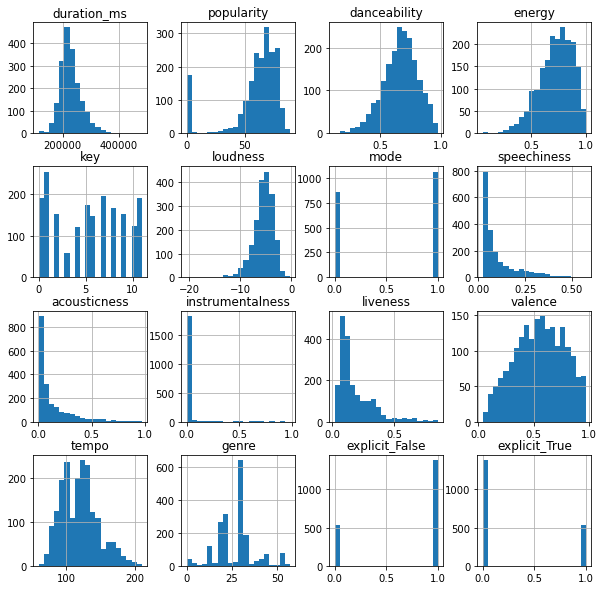

In [17]:
df.hist(bins=20, figsize=(10,10)) # 히스토그램 그리기

In [18]:
df[['tempo']]=np.log(df[['tempo']]) # tempo 분포가 오른쪽 꼬리분포라 로그변환 시행

In [19]:
df[['popularity','danceability','energy']]=df[['popularity','danceability','energy']].pow(2)
# popularity, danceability, energy는 왼쪽 꼬리분포라 지수변환 시행

In [20]:
df[['acousticness']]=df[['acousticness']].pow(1/4) # acousticness 오른쪽 꼬리분포라 멱승변환 시행

In [21]:
df['liveness']=df['liveness'].pow(1/16) # liveness 오른쪽 꼬리분포라 멱승변환 시행

array([[<AxesSubplot:title={'center':'duration_ms'}>,
        <AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'energy'}>],
       [<AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'loudness'}>,
        <AxesSubplot:title={'center':'mode'}>,
        <AxesSubplot:title={'center':'speechiness'}>],
       [<AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>,
        <AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'valence'}>],
       [<AxesSubplot:title={'center':'tempo'}>,
        <AxesSubplot:title={'center':'genre'}>,
        <AxesSubplot:title={'center':'explicit_False'}>,
        <AxesSubplot:title={'center':'explicit_True'}>]], dtype=object)

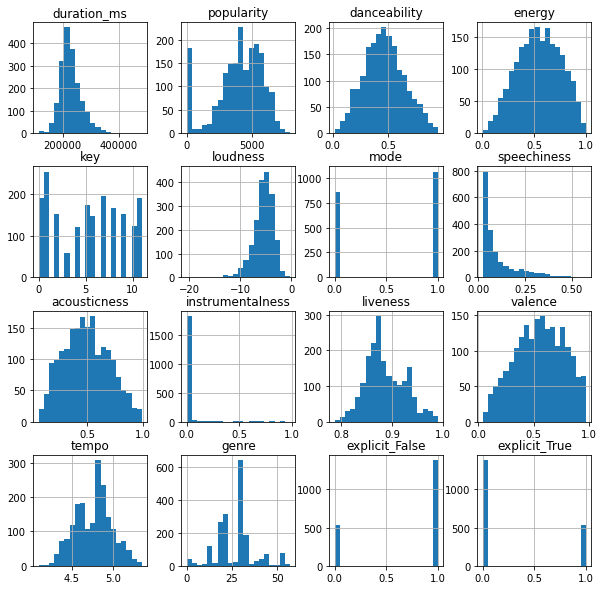

In [22]:
df.hist(bins=20, figsize=(10,10)) # 변화된 모습 확인

# 이상치

위에 로그변환, 지수,멱승변환으로 이상치를 어느정도 해결했지만 몇몇변수들은 음수거나 너무 작은 값들이라서 변환하지 못했음

그래서 박스플롯을 그려서 대체

In [23]:
df.describe() #이상치 대체를 위한 중앙값 찾기 위해 데이터프레임을 describe 해봄

,duration_ms,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,explicit_False,explicit_True
count,1919.000000,1919.000000,1919.000000,1919.000000,1919.000000,1919.000000,1919.000000,1919.000000,1919.000000,1919.000000,1919.000000,1919.000000,1919.000000,1919.000000,1919.000000,1919.000000
mean,228761.545076,4024.253257,0.464682,0.543699,5.387181,-5.510079,0.552892,0.104229,0.494593,0.015136,0.886149,0.551702,4.764036,27.101615,0.721209,0.278791
std,39188.660750,1813.147489,0.181468,0.207832,3.607960,1.942778,0.497324,0.096449,0.204029,0.087510,0.038279,0.220776,0.222682,10.529842,0.448521,0.448521
min,113000.000000,0.000000,0.016641,0.003014,0.000000,-20.514000,0.000000,0.023200,0.066195,0.000000,0.786642,0.038100,4.094661,0.000000,0.000000,0.000000
25%,203560.000000,3136.000000,0.337561,0.389376,2.000000,-6.480000,0.000000,0.039900,0.340866,0.000000,0.859438,0.388500,4.594973,19.000000,0.000000,0.000000
50%,223253.000000,4225.000000,0.456976,0.544644,6.000000,-5.283000,1.000000,0.061200,0.485152,0.000000,0.878126,0.558000,4.787675,30.000000,1.000000,0.000000
75%,248133.000000,5329.000000,0.583696,0.705600,8.000000,-4.168000,1.000000,0.130000,0.646784,0.000067,0.915142,0.730000,4.900314,31.000000,1.000000,1.000000
max,484146.000000,7921.000000,0.950625,0.998001,11.000000,-0.276000,1.000000,0.576000,0.993945,0.985000,0.990112,0.973000,5.351152,57.000000,1.000000,1.000000


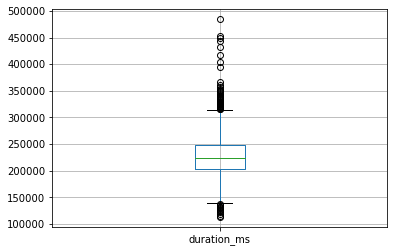

In [24]:
import matplotlib.pyplot as plt
boxplot=df.boxplot(column=['duration_ms']) # 위쪽에 떨어져 있는 8개 데이터 즉 359000 넘은 데이터들 대체 필요

이상치가 너무 많아서 이상치 중에서도 완전 튀는 애들만 골라내자고 판단. 위에 동떨어져 있는 이상치들만 빼자고 판단

In [25]:
df.sort_values("duration_ms", ascending = False).head(10)

,duration_ms,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,explicit_False,explicit_True
1381,484146,6084,0.329476,0.262144,5,-6.664,0,0.0503,0.695511,0.000000,0.862965,0.512,4.342493,30,1,0
140,452906,2500,0.372100,0.672400,3,-10.029,1,0.0312,0.120523,0.146000,0.883573,0.450,4.851976,0,1,0
706,448573,4900,0.471969,0.522729,7,-4.751,1,0.0709,0.591003,0.001020,0.965794,0.432,4.330733,30,1,0
760,444333,3249,0.737881,0.463761,1,-6.247,1,0.0549,0.763607,0.000161,0.907870,0.852,4.797797,30,0,1
242,432146,2304,0.617796,0.727609,9,-8.274,0,0.0688,0.472634,0.087200,0.936492,0.309,4.844108,0,1,0
1825,417920,5776,0.815409,0.455625,11,-3.445,0,0.2140,0.858025,0.000013,0.838315,0.442,4.569616,28,0,1
102,404106,6889,0.608400,0.589824,6,-4.325,0,0.2380,0.438878,0.000002,0.959722,0.507,4.382814,14,0,1
516,393813,3969,0.555025,0.509796,7,-3.681,1,0.0751,0.344592,0.022200,0.938629,0.365,4.644420,0,1,0
499,366733,3721,0.069696,0.439569,9,-8.264,1,0.1870,0.876421,0.004430,0.935140,0.249,5.118461,33,1,0
333,359973,2209,0.720801,0.248004,2,-7.872,1,0.2720,0.583599,0.000045,0.920997,0.502,4.532384,21,0,1


그래서 duration_ms 값 오름차순으로 정렬해봤더니 툭 튀는 애들 8개가 있어서 이 8개 다른 값으로 바꾸자고 판단함. 

이상치들을 중앙값으로 대체하자고 판단!

In [26]:
df['duration_ms']=df['duration_ms'].replace(484146,223279.5)
df['duration_ms']=df['duration_ms'].replace(452906,223279.5)
df['duration_ms']=df['duration_ms'].replace(448573,223279.5)
df['duration_ms']=df['duration_ms'].replace(444333,223279.5)
df['duration_ms']=df['duration_ms'].replace(432146,223279.5)
df['duration_ms']=df['duration_ms'].replace(417920,223279.5)
df['duration_ms']=df['duration_ms'].replace(404106,223279.5)
df['duration_ms']=df['duration_ms'].replace(393813,223279.5)
 #이상치들 다 중앙값으로 대체함. 

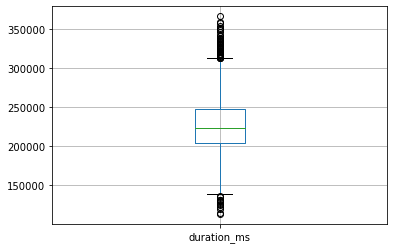

In [27]:
boxplot=df.boxplot(column=['duration_ms']) #이상치 제거된 거 확인

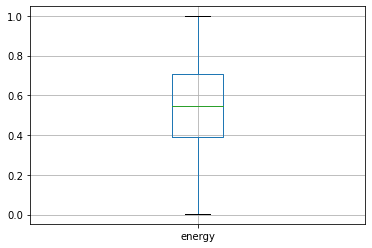

In [28]:
#energy 이상치 확인

boxplot=df.boxplot(column=['energy'])  #이상치 없음

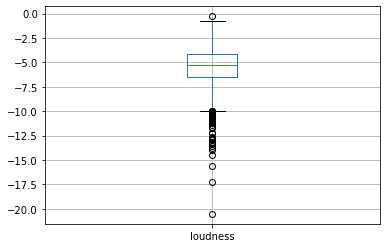

In [29]:
#loudness 이상치 확인

boxplot=df.boxplot(column=['loudness']) # 밑에 3개 바꿈

In [30]:
df.sort_values("loudness", ascending = True).head(5)

,duration_ms,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,explicit_False,explicit_True
1492,300840.0,5041,0.337561,0.003014,10,-20.514,0,0.0397,0.864675,0.000000,0.848219,0.234,5.024124,30,1,0
496,189506.0,4225,0.119025,0.003376,3,-17.217,1,0.0374,0.993945,0.000366,0.867566,0.304,5.159727,30,1,0
564,197160.0,3600,0.285156,0.061009,0,-15.636,1,0.0322,0.847544,0.008590,0.876794,0.344,4.408766,38,1,0
1969,193143.0,5625,0.819025,0.151321,8,-14.505,1,0.3320,0.927487,0.162000,0.869124,0.196,4.787875,31,1,0
762,241293.0,5776,0.162409,0.178084,7,-13.964,0,0.0373,0.605029,0.000021,0.857902,0.378,4.809971,4,0,1


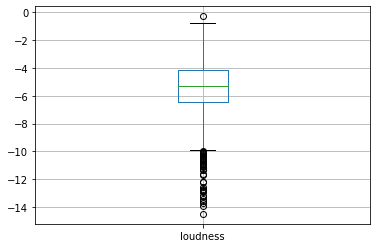

In [31]:
df['loudness']=df['loudness'].replace(-20.514,-5.283000) #중앙값으로 변경
df['loudness']=df['loudness'].replace(-17.217,-5.283000)
df['loudness']=df['loudness'].replace(-15.636,-5.283000)

boxplot=df.boxplot(column=['loudness'])

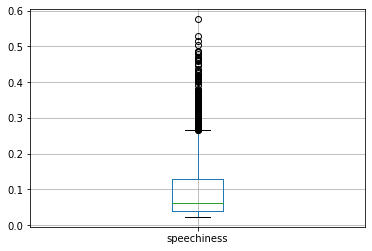

In [32]:
#speechiness 이상치 확인

boxplot=df.boxplot(column=['speechiness']) # 하나만 대체

In [33]:
df.sort_values("speechiness", ascending = False).head(5)

,duration_ms,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,explicit_False,explicit_True
736,253706.0,3481,0.385641,0.360000,8,-6.349,1,0.576,0.725471,0.0,0.957002,0.485,4.382289,19,0,1
1856,142273.0,6241,0.927369,0.119716,5,-9.309,0,0.530,0.434067,0.0,0.870140,0.562,4.787133,14,0,1
1863,221013.0,5184,0.559504,0.561001,8,-5.916,0,0.516,0.613864,0.0,0.847848,0.659,4.500809,14,0,1
355,234893.0,3249,0.499849,0.289444,0,-5.264,1,0.505,0.775670,0.0,0.930714,0.439,4.801822,21,0,1
159,197760.0,4624,0.643204,0.116281,7,-8.560,1,0.488,0.641168,0.0,0.852825,0.849,5.112048,14,0,1


In [34]:
df['speechiness']=df['speechiness'].replace(0.871,0.497) #중앙값으로 변경

# 변수와 변수 사이 관계

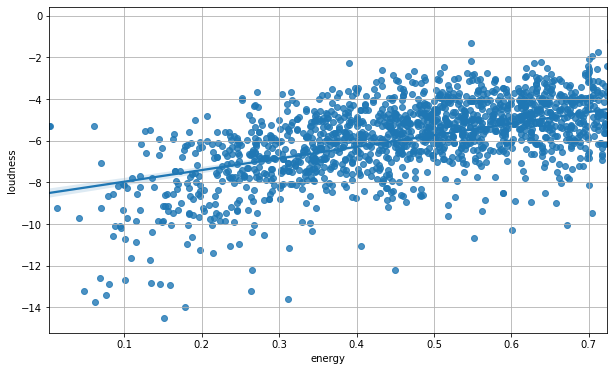

In [35]:
#산점도
import seaborn as sns

plt.rcParams["figure.figsize"]=(10,6)
sns.regplot(x='energy', y='loudness', data=df)
plt.xlim(df['energy'].min(), df['loudness'].max()+1)

plt.grid()
plt.show()

loudness와 energy 변수 관계 파악 

양의 상관관계가 있음을 알 수 있음. 

# 새로운 변수 만들기

In [36]:
#앞에서 찍은 산점도를 기반으로 새로운 변수 생성(두 변수가 양의 상관관계가 있다는 것을 확인 했기 때문에)


df['exciting']=df['energy']+df['loudness']
df

,duration_ms,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,explicit_False,explicit_True,exciting
0,211160.0,5929,0.564001,0.695556,1,-5.444,0,0.0437,0.740083,0.000018,0.937323,0.894,4.554435,30,1,0,-4.748444
1,167066.0,6241,0.188356,0.804609,0,-4.918,1,0.0488,0.318573,0.000000,0.969777,0.684,5.002106,54,1,0,-4.113391
2,250546.0,4356,0.279841,0.246016,7,-9.007,1,0.0290,0.644928,0.000000,0.917233,0.278,4.918951,36,1,0,-8.760984
3,224493.0,6084,0.303601,0.833569,0,-4.063,0,0.0466,0.402707,0.000013,0.935989,0.544,4.787425,53,1,0,-3.229431
4,200560.0,4225,0.376996,0.861184,8,-4.806,0,0.0516,0.449433,0.001040,0.856897,0.879,5.151301,30,1,0,-3.944816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,181026.0,6241,0.708964,0.538756,1,-5.065,0,0.0588,0.454576,0.000000,0.869124,0.952,4.926949,30,1,0,-4.526244
1996,178426.0,6084,0.304704,0.492804,9,-5.707,1,0.1570,0.584853,0.000021,0.868609,0.564,5.135763,30,1,0,-5.214196
1997,200593.0,4761,0.717409,0.459684,9,-8.635,1,0.1090,0.508577,0.000000,0.922273,0.811,4.584804,17,1,0,-8.175316
1998,171029.0,5625,0.549081,0.270400,8,-7.513,1,0.0656,0.819036,0.000002,0.910221,0.347,4.634710,30,1,0,-7.242600


# 모델 적용

In [37]:
#xgboost 적용

X= df.drop(["genre"], axis = 1)
y = df.genre

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

model = XGBClassifier(random_state=42)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)


print(accuracy)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:00:27] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.2760416666666667


In [38]:
#decisiontree 적용

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train,y_train)
y_pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)

print(accuracy)

0.1640625


In [39]:
#randomforest 적용

from sklearn.ensemble import RandomForestClassifier

rf_clf=RandomForestClassifier(random_state=42)
rf_clf.fit(X_train,y_train)
y_pred=rf_clf.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)

print(accuracy)

0.3151041666666667


In [40]:
#GBM 적용

from sklearn.ensemble import GradientBoostingClassifier

model=GradientBoostingClassifier(random_state=42)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)

print(accuracy)

0.2708333333333333


In [41]:
#LGBM 적용

from lightgbm import LGBMClassifier

model=LGBMClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)

print(accuracy)

0.2890625


In [42]:
#Adaboost parameter 구성


from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(random_state=42)

ada.fit(X_train,y_train)

y_pred=model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)

print(accuracy)

0.2890625


In [43]:
#소프트 보팅

from sklearn.ensemble import VotingClassifier

dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
gb = GradientBoostingClassifier()
xgb = XGBClassifier()
ada = AdaBoostClassifier()

vo_clf = VotingClassifier(estimators=[('DT', dt_clf),('RF',rf_clf),('GB',gb),('XGB',xgb),('ADA',ada)], voting='soft')

vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print(accuracy_score(y_test,pred))

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:02:25] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.2786458333333333


In [44]:
#하드 보팅

from sklearn.ensemble import VotingClassifier

dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
gb = GradientBoostingClassifier()
xgb = XGBClassifier()
ada = AdaBoostClassifier()

vo_clf = VotingClassifier(estimators=[('DT', dt_clf),('RF',rf_clf),('GB',gb),('XGB',xgb),('ADA',ada)], voting='hard')

vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print(accuracy_score(y_test,pred))

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:03:21] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.3125


# 시각화

정확도가 너무 낮아서 정확도를 올릴 방법을 고안해보고자 시각화를 진행함. 

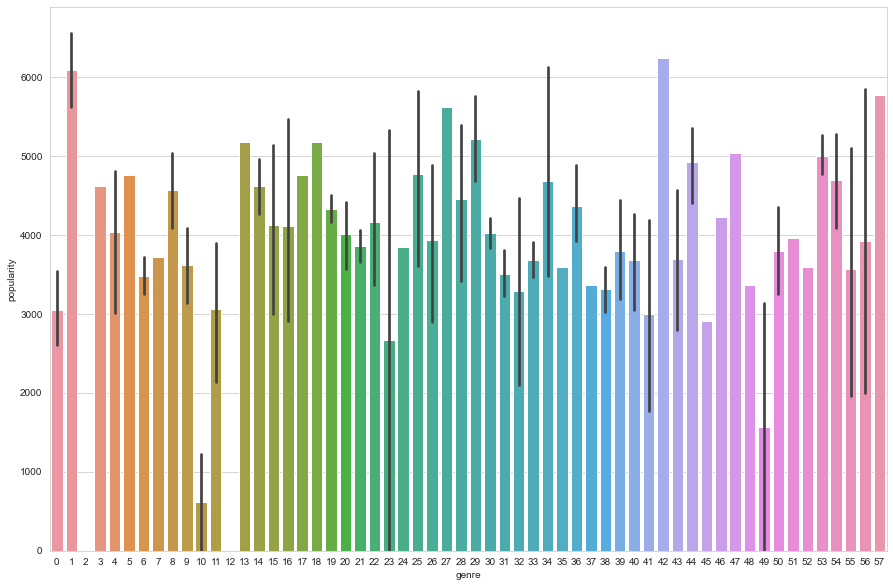

In [45]:
#genre와 popularity의 관계 파악을 위해 막대그래프를 그림

import seaborn as sns

sns.set_style('whitegrid')
fig=plt.figure(figsize=(15,10))
sns.barplot(x='genre',y=df['popularity'],data=df)
plt.show()

genre열의 2번과 12번이 0인 것을 보고 실제 값을 확인하기 위해 value_counts() 실행.

In [46]:
df['genre'].value_counts()

30    416
19    267
21    236
31    216
33    172
14    121
20     75
44     57
0      41
54     39
53     36
39     28
40     26
15     15
28     15
25     14
43     14
4      13
41     12
29      9
11      9
26      9
36      8
55      8
32      8
34      6
56      4
22      3
16      3
10      2
8       2
42      2
38      2
9       2
6       2
23      2
1       2
50      2
49      2
48      1
57      1
18      1
13      1
27      1
47      1
51      1
12      1
46      1
35      1
3       1
2       1
37      1
7       1
24      1
5       1
52      1
45      1
17      1
Name: genre, dtype: int64

2번과 12번은 데이터가 하나이고 그 데이터의 popularity 값이 0임.

이렇게 너무 개수가 너무 적은 장르들을 정확도를 계산하는 데에 포함시키는 게 맞는지에 대한 의문이 생겨서 데이터 개수가 상위 열개인 장르 행들만 남기자고 결정함. (일종의 이상치라고 생각했기 때문)

In [47]:
value30=df.loc[df['genre']==30]
value19=df.loc[df['genre']==19]
value21=df.loc[df['genre']==21]
value31=df.loc[df['genre']==31]
value33=df.loc[df['genre']==33]
value14=df.loc[df['genre']==14]
value20=df.loc[df['genre']==20]
value44=df.loc[df['genre']==44]
value0=df.loc[df['genre']==0]
value54=df.loc[df['genre']==54]

value_result=pd.concat([value30,value19,value21,value31,value33,value14,value20,value44,value0,value54])

In [48]:
df=value_result
df

,duration_ms,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,explicit_False,explicit_True,exciting
0,211160.0,5929,0.564001,0.695556,1,-5.444,0,0.0437,0.740083,0.000018,0.937323,0.894,4.554435,30,1,0,-4.748444
4,200560.0,4225,0.376996,0.861184,8,-4.806,0,0.0516,0.449433,0.001040,0.856897,0.879,5.151301,30,1,0,-3.944816
10,238759.0,1,0.380689,0.529984,7,-7.932,1,0.0292,0.425568,0.048200,0.938143,0.808,4.934949,30,1,0,-7.402016
11,268863.0,3136,0.555025,0.917764,7,-9.664,1,0.0287,0.533977,0.324000,0.961436,0.960,4.867242,30,1,0,-8.746236
12,306333.0,3025,0.675684,0.850084,11,-5.798,0,0.0989,0.413022,0.325000,0.917461,0.568,5.098805,30,1,0,-4.947916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1610,258266.0,6724,0.241081,0.480249,0,-6.487,0,0.0377,0.677752,0.000007,0.932165,0.412,4.500110,54,1,0,-6.006751
1656,263786.0,5776,0.407044,0.853776,7,-3.887,1,0.0360,0.212784,0.000175,0.887818,0.530,4.718454,54,1,0,-3.033224
1777,193613.0,3721,0.494209,0.753424,7,-4.661,0,0.0291,0.622333,0.132000,0.868090,0.733,4.796038,54,0,1,-3.907576
1846,185863.0,4900,0.343396,0.389376,5,-5.946,1,0.1130,0.351700,0.000002,0.881537,0.267,4.233759,54,1,0,-5.556624


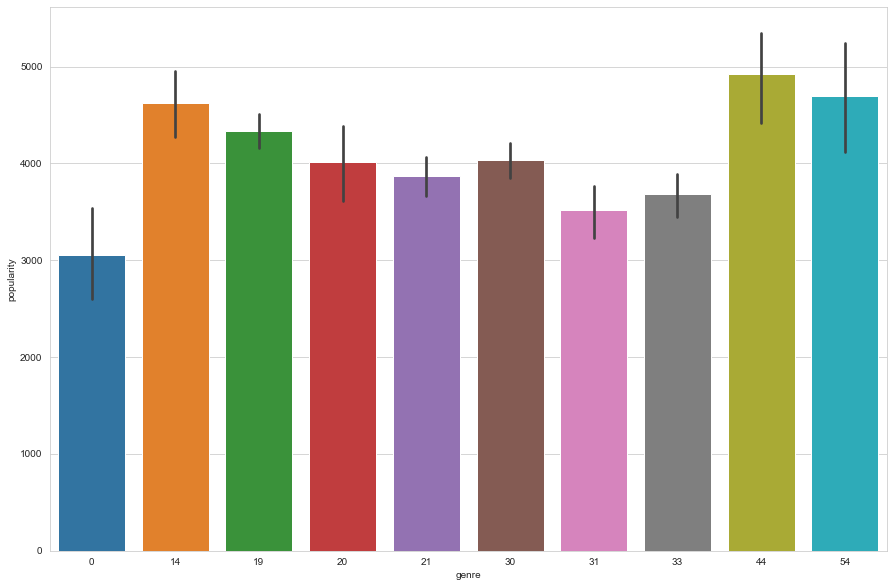

In [49]:
#남긴 10개 장르로만 popularity와 genre와의 막대그래프 생성

sns.set_style('whitegrid')
fig=plt.figure(figsize=(15,10))
sns.barplot(x='genre',y=df['popularity'],data=df)
plt.show()

상위 10개 장르 중

dance/electronic이 popularity의 평균이 제일 낮았다.

<장르별 인기 순위>

1등 44번 rock 장르
2등 54번 rock pop 장르
3등 14번 hiphop 장르
4등 19번 hiphop, pop 장르
5등 20번 hip hop, pop, Dance/Electronic 장르
6등 21번 hip hop, pop, R&B 장르
7등 30번 pop 장르
8등 33번 pop, R&B 장르
9등 31번 pop, Dance/Electronic 장르
10등 0번 Dance/Electronic 장르 

rock이랑 hiphop, pop 장르들이 인기 많은 것을 확인할 수 있었다. 

데이터 개수가 적은 장르들을 다 제거하니 유의미한 그래프를 도출할 수 있었다. 

그래서 모델 적용할 때도 이렇게 정리된 데이터를 사용하기로 하였다.

밑에는 그 외의 다양한 시각화 그래프들입니다.

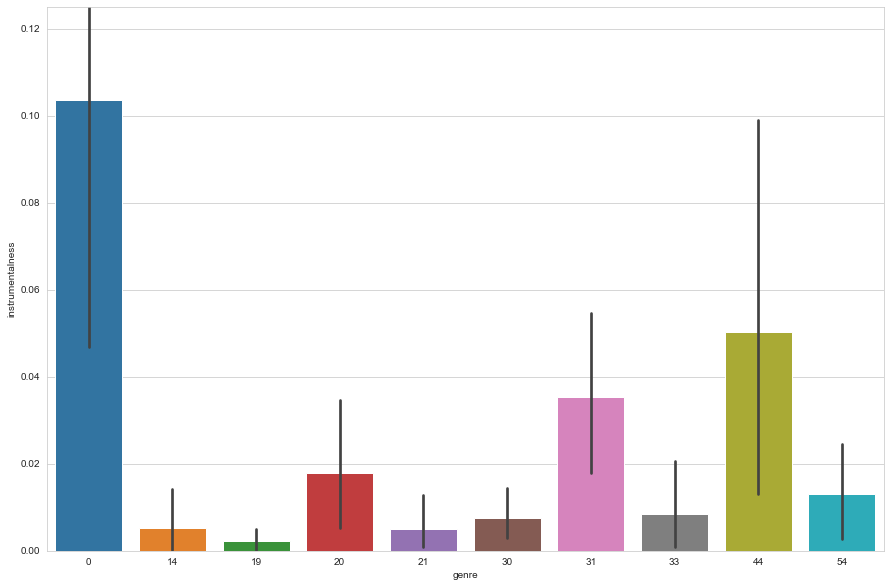

In [50]:
sns.set_style('whitegrid')
fig=plt.figure(figsize=(15,10))
sns.barplot(x='genre',y=df['instrumentalness'],data=df)
plt.ylim([0, 0.125])

plt.show()

In [51]:
df['explicit']=df['explicit_True'] #그래프 그리기 위해서 잠시 추가

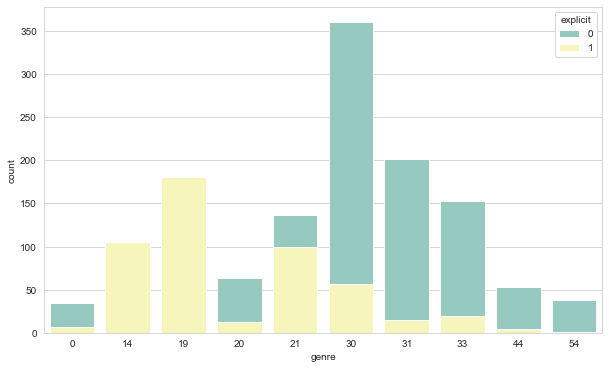

In [54]:
import seaborn as sns
import matplotlib as plt

sns.countplot(x='genre', hue='explicit', palette='Set3', dodge=False, data=df)
figsize=(50,10)

In [55]:
df.drop(['explicit'], axis=1) #다시 없애고

,duration_ms,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,explicit_False,explicit_True,exciting
0,211160.0,5929,0.564001,0.695556,1,-5.444,0,0.0437,0.740083,0.000018,0.937323,0.894,4.554435,30,1,0,-4.748444
4,200560.0,4225,0.376996,0.861184,8,-4.806,0,0.0516,0.449433,0.001040,0.856897,0.879,5.151301,30,1,0,-3.944816
10,238759.0,1,0.380689,0.529984,7,-7.932,1,0.0292,0.425568,0.048200,0.938143,0.808,4.934949,30,1,0,-7.402016
11,268863.0,3136,0.555025,0.917764,7,-9.664,1,0.0287,0.533977,0.324000,0.961436,0.960,4.867242,30,1,0,-8.746236
12,306333.0,3025,0.675684,0.850084,11,-5.798,0,0.0989,0.413022,0.325000,0.917461,0.568,5.098805,30,1,0,-4.947916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1610,258266.0,6724,0.241081,0.480249,0,-6.487,0,0.0377,0.677752,0.000007,0.932165,0.412,4.500110,54,1,0,-6.006751
1656,263786.0,5776,0.407044,0.853776,7,-3.887,1,0.0360,0.212784,0.000175,0.887818,0.530,4.718454,54,1,0,-3.033224
1777,193613.0,3721,0.494209,0.753424,7,-4.661,0,0.0291,0.622333,0.132000,0.868090,0.733,4.796038,54,0,1,-3.907576
1846,185863.0,4900,0.343396,0.389376,5,-5.946,1,0.1130,0.351700,0.000002,0.881537,0.267,4.233759,54,1,0,-5.556624


<AxesSubplot:>

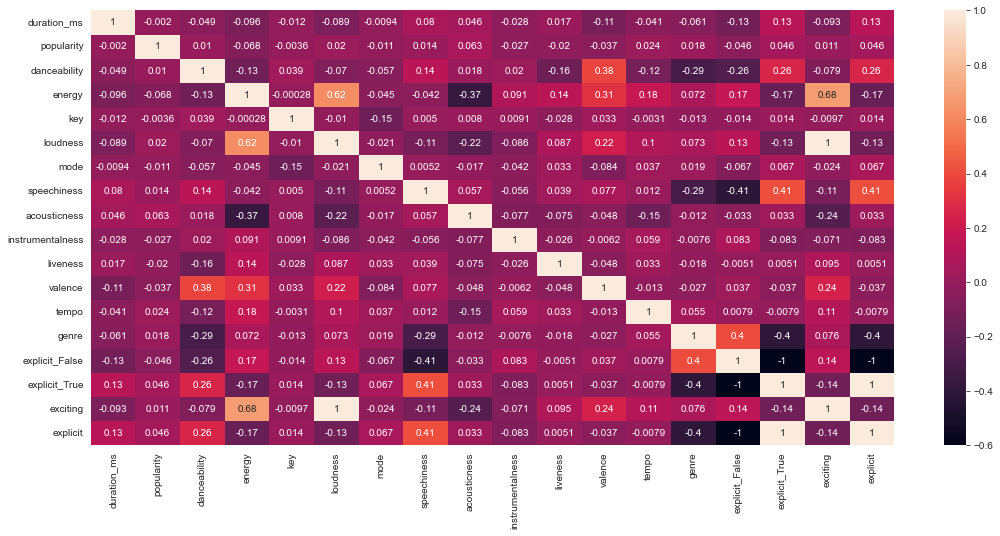

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, square=False, vmin=-.6, vmax=1.0) # 상관관계

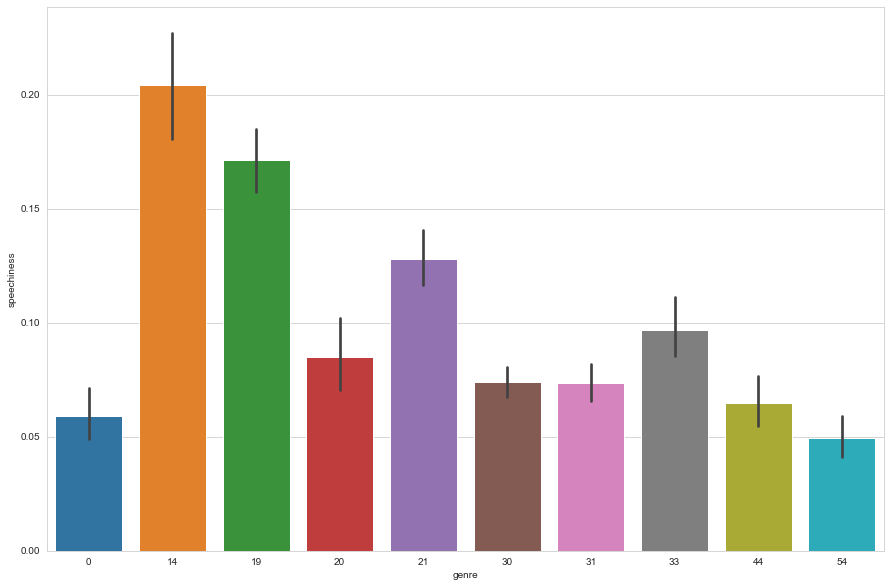

In [57]:
sns.set_style('whitegrid')
fig=plt.figure(figsize=(15,10))
sns.barplot(x='genre',y=df['speechiness'],data=df)


plt.show() #hiphop 장르는 말이 많음

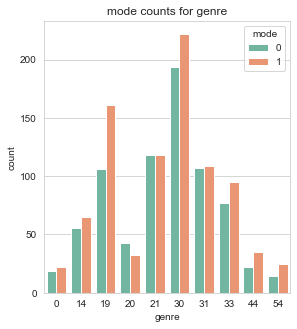

In [58]:
fig=plt.figure(figsize=(15,5))
ax2=fig.add_subplot(1,3,2)
sns.countplot(x='genre',hue='mode',palette='Set2',data=df, ax=ax2)
ax2.set_title('mode counts for genre')

plt.show()

#보통은 장조가 많고 특이하게 단조가 많은 20번이 존재

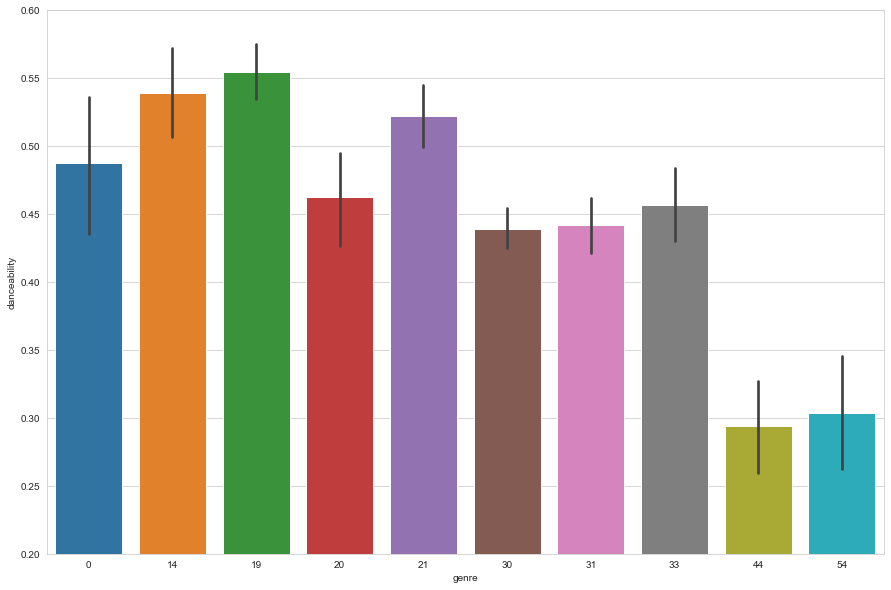

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(15,10))
sns.set_style('whitegrid')
sns.barplot(x='genre',y=df['danceability'],data=df)

plt.ylim(0.2, 0.6)


plt.show()

#rock 장르가 춤추는데 적당하지 않음 등등  분석

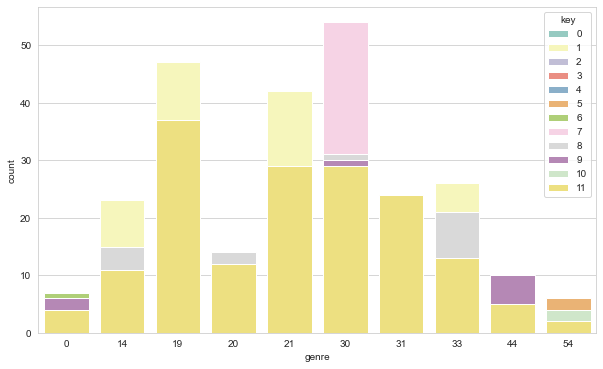

<Figure size 1080x720 with 0 Axes>

In [60]:
sns.countplot(x='genre', hue='key', palette='Set3', dodge=False, data=df)
fig=plt.figure(figsize=(15,10))

#30번 장르에는 특이하게 7번 key가 많네요

# 모델 적용

In [61]:
#xgboost 적용

X= df.drop(["genre"], axis = 1)
y = df.genre

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
model = XGBClassifier(random_state=42)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)

print(accuracy)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:12:30] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.39634146341463417


In [62]:
#decisiontree 적용

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train,y_train)
y_pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)

print(accuracy)

0.25609756097560976


In [63]:
#randomforest 적용

from sklearn.ensemble import RandomForestClassifier

rf_clf=RandomForestClassifier(random_state=42)
rf_clf.fit(X_train,y_train)
y_pred=rf_clf.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)

print(accuracy)

0.4115853658536585


In [64]:
# 랜덤 포레스트가 가장 정확도가 가장 높게 나옴 -> 랜덤포레스트의 변수 중요도
rf_clf.fit(X_train, y_train)
print(rf_clf.feature_importances_)

[0.08973302 0.07730877 0.08325704 0.07614881 0.049238   0.06400755
 0.01550251 0.08963771 0.07081224 0.05121027 0.06613529 0.0710316
 0.08097775 0.01660666 0.01169137 0.06640419 0.02029721]


In [65]:
# 변수 중요도 결과물 데이터프레임화시킴 (보기 편하라고)
pd.concat([pd.DataFrame(X. columns.tolist()),
          pd.DataFrame(rf_clf.feature_importances_)],
         axis=1)

# -> 변수들의 변수중요도 차이가 크지 않음

,0,0
0,duration_ms,0.089733
1,popularity,0.077309
2,danceability,0.083257
3,energy,0.076149
4,key,0.049238
5,loudness,0.064008
6,mode,0.015503
7,speechiness,0.089638
8,acousticness,0.070812
9,instrumentalness,0.051210


In [66]:
#GBM 적용

from sklearn.ensemble import GradientBoostingClassifier

model=GradientBoostingClassifier(random_state=42)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)

print(accuracy)

0.3871951219512195


In [67]:
#LGBM 적용

from lightgbm import LGBMClassifier

model=LGBMClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)

print(accuracy)

0.3780487804878049


In [68]:
#Adaboost parameter 구성


from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(random_state=42)

ada.fit(X_train,y_train)

y_pred=model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)

print(accuracy)

0.3780487804878049


In [69]:
#소프트 보팅

from sklearn.ensemble import VotingClassifier

dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
gb = GradientBoostingClassifier()
xgb = XGBClassifier()
ada = AdaBoostClassifier()

vo_clf = VotingClassifier(estimators=[('DT', dt_clf),('RF',rf_clf),('GB',gb),('XGB',xgb),('ADA',ada)], voting='soft')

vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print(accuracy_score(y_test,pred))

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:12:51] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.3597560975609756


In [70]:
#하드 보팅

from sklearn.ensemble import VotingClassifier

dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
gb = GradientBoostingClassifier()
xgb = XGBClassifier()
ada = AdaBoostClassifier()

vo_clf = VotingClassifier(estimators=[('DT', dt_clf),('RF',rf_clf),('GB',gb),('XGB',xgb),('ADA',ada)], voting='hard')

vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print(accuracy_score(y_test,pred))

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:13:02] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.4054878048780488


정확도가 확실히 상승한 것을 볼 수 있었다. 